<a href="https://colab.research.google.com/github/Riftabin/Regression_in_Business_Analytics/blob/master/EDA_AMAZONE_DATA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':'1riaj_tHsTglOv-AO46pf4j1-GWWJkzKt'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Amazon_Data.csv')

In [7]:
import pandas as pd
xyz = pd.read_csv('Amazon_Data.csv') 
print(xyz.head(6))

                     id  ... reviews.username
0  AVqkIhwDv8e3D1O-lebb  ...          Adapter
1  AVqkIhwDv8e3D1O-lebb  ...           truman
2  AVqkIhwDv8e3D1O-lebb  ...            DaveZ
3  AVqkIhwDv8e3D1O-lebb  ...           Shacks
4  AVqkIhwDv8e3D1O-lebb  ...        explore42
5  AVqkIhwDv8e3D1O-lebb  ...            tklit

[6 rows x 21 columns]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

# Importing dataset
df=pd.read_csv('Amazon_Data.csv') 
print("Shape of data=>",df.shape)

Shape of data=> (34660, 21)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The dataset contains 34,660 rows and 21 columns. But we only need information such as product name, review text, user recommendation (binary), and the number of people that found a review helpful. Therefore, I am dropping other columns and reducing the dataset to only four columns, i.e., ‘name’, ‘reviews.text’, ‘reviews.doRecommend’, and ‘reviews.numHelpful’:

In [9]:
df=df[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (34660, 4)


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


Let’s see if there are any null values present in our dataset:

In [10]:
df.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

There are a few null values in the dataset. So, let’s drop these null values and proceed further:

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

I am only considering those products that have at least 500 reviews. I am doing this to make sure that I have a sufficient number of reviews for each product. Here, we will use lambda functions with filter() to filter our dataset.

In [13]:
df = df.groupby('name').filter(lambda x:len(x)>500).reset_index(drop = True )
print('number of products =>',len(df['name'].unique()))

number of products => 8


Now, we are left with eight products. Also,  the ‘reviews.doRecommend’ column contains values in the form of True-False and’ reviews.numHelpful’ contains floating-point numbers, which is not possible. Therefore, I am converting these columns into integers:

In [14]:
df['reviews.doRecommend'] = df['reviews.doRecommend'].astype(int)
df['reviews.numHelpful']=df['reviews.numHelpful'].astype(int)


Cleaning Text Data in Python
Generally, text data contains a lot of noise either in the form of symbols or in the form of punctuations and stopwords. Therefore, it becomes necessary to clean the text, not just for making it more understandable but also for getting better insights.

In this section, we’ll perform text cleaning on the columns containing textual data. If you want to learn in-depth about text cleaning in Python, you can read this fantastic article: Steps for effective text data cleaning (with a case study using Python). It explains various techniques of text cleaning with implementation in python.

Here, we have four columns in our dataset out of which two columns (‘name’, ‘reviews.text’) contain textual data. So, let’s start with the ‘name’ column first and take a look at the text present in this column:

That’s it! We are finished with the basic data-preprocessing part. Let’s move to the next section – cleaning text data.

Here, we have four columns in our dataset out of which two columns (‘name’, ‘reviews.text’) contain textual data. So, let’s start with the ‘name’ column first and take a look at the text present in this column:

In [15]:

df['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

Take a close look at the title of products. Some product names contain repeating names separated by three consecutive commas (,,,). So, let’s clean the name of the products:

In [16]:

df['name']=df['name'].apply(lambda x: x.split(',,,')[0])

Now, it’s time to move on to the second column – reviews.text’. This column contains product reviews from different users, which are longer in length, and our complete analysis will be based on this data. Therefore, it becomes necessary to clean this thoroughly. The best way of determining data cleaning steps is by taking a look at some product reviews from the dataset:

In [22]:
for index,text in enumerate (df['reviews.text'][10:20]):
  print('Riview %d: \n'%  (index + 1),text)

Riview 1: 
 Not easy for elderly users cease of ads that pop up.
Riview 2: 
 Excellent product. Easy to use, large screen makes watching movies and reading easier.
Riview 3: 
 Wanted my father to have his first tablet and this is a very good value. He can watch movies and play a few games. Easy enough for him to use.
Riview 4: 
 Simply does everything I need. Thank youAnd silk works wonders
Riview 5: 
 Got it as a present and love the size of the screen
Riview 6: 
 The kindle is easiest to use, graphics and screen crisp, clear, brilliant colors.
Riview 7: 
 nice reader. almost perfect for what i want/need. good bargain
Riview 8: 
 I really like this tablet. I would have given 5 stars but sometimes you have to push start several times after you unlock the screen and it is a little annoying.
Riview 9: 
 Great video quality lots of fun apps fun for the whole family
Riview 10: 
 Love love love my kindle fire 8.....this is what my 9 yr old granddaughter said when I bought this for her at Ch

Here, you can see that we have some contractions like “It’s”, numbers like “3” and punctuations like “,”, “!” and “.” present in the reviews. We’ll handle these by performing the below operations:

Expand contractions
Lowercase the reviews
Remove digits and words containing digits
Remove punctuations
So, let’s start by expanding contractions.

Expand Contractions
Contractions are the shortened versions of words like don’t for do not and how’ll for how will. These are used to reduce the speaking and writing time of words. We need to expand these contractions for a better analysis of the reviews.

Here, I have created a dictionary of common English contractions that I will use for mapping the contractions to their expanded forms:

In [23]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews
df['reviews.text']=df['reviews.text'].apply(lambda x:expand_contractions(x))



Here, the expand_contractions function uses regular expressions to map the contractions in the text to their expanded forms from the dictionary. I will be using regular expressions a lot in the upcoming sections. Therefore, I highly recommend you to read the following articles on regular expressions:
Now that we have expanded the contractions, it’s time to lowercase the words.

https://www.analyticsvidhya.com/blog/2015/06/regular-expression-python/

Beginner’s Tutorial for Regular Expressions in Python
Extracting information from reports using Regular Expressions Library in Python
4 Applications of Regular Expressions that every Data Scientist should know (with Python code)!

https://www.analyticsvidhya.com/blog/2020/01/4-applications-of-regular-expressions-that-every-data-scientist-should-know-with-python-code/

https://www.analyticsvidhya.com/blog/2017/03/extracting-information-from-reports-using-regular-expressons-library-in-python/

Lowercase the reviews

In NLP, models treat words like Goat and goat differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words. Here, I am using the lower() function available in Python for converting text to lowercase:

In [24]:
df['cleaned']=df['reviews.text'].apply(lambda x: x.lower())

Remove digits and words containing digits

Next, we need to remove numbers and words containing digits from the reviews. I am doing this because digits and words containing digits do not give much importance to the main words. To do this, I am using regular expressions with lambda functions.

In [25]:

df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

Remove Punctuations

Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis. Therefore, they need to be removed:


df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [26]:

df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

Here, string.punctuations function contains all the punctuations and we use regular expressions to search them in the text and remove them. Finally, we still have some extra spaces present in the data. Let’s remove them:

In [27]:

# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

Let’s how our text looks after cleaning:

In [30]:

for index,text in enumerate(df['cleaned'][10:20]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 not easy for elderly users cease of ads that pop up
Review 2:
 excellent product easy to use large screen makes watching movies and reading easier
Review 3:
 wanted my father to have his first tablet and this is a very good value he can watch movies and play a few games easy enough for him to use
Review 4:
 simply does everything i need thank youand silk works wonders
Review 5:
 got it as a present and love the size of the screen
Review 6:
 the kindle is easiest to use graphics and screen crisp clear brilliant colors
Review 7:
 nice reader almost perfect for what i wantneed good bargain
Review 8:
 i really like this tablet i would have given stars but sometimes you have to push start several times after you unlock the screen and it is a little annoying
Review 9:
 great video quality lots of fun apps fun for the whole family
Review 10:
 love love love my kindle fire this is what my yr old granddaughter said when i bought this for her at christmaswe have purchased kindled in t

Preparing Text Data for Exploratory Data Analysis (EDA)

We have already cleaned our data and have our corpus ready, but there are still some steps left to be done before EDA. In this section, we’ll create a Document Term Matrix that we’ll later use in our analysis.

Now, you might be wondering what is a Document Term Matrix and why do we have to create one?

A Document Term Matrix provides the frequency of a word in a corpus (collection of documents), which in this case are reviews. It helps in analyzing the occurrence of words in different documents in a corpus. The following figure is an example of a document term matrix:

In this section, we’ll do the following things:

#Stopwords Removal
#Lemmatization
#Create Document Term Matrix

Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.

We’ll use SpaCy for the removal of stopwords and lemmatization. It is a library for advanced Natural Language Processing in Python and Cython.

In [32]:

# Importing spacy
import spacy
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

We have removed stopwords and lemmatized our reviews successfully. Let’s group them according to the products:

In [33]:
df_grouped=df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint child love use like abi...
Amazon Fire Tv,echo learn everyday use daily use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice little set slow wish investigate little j...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,good value money hand work perfectly purchase ...
Echo (White),compete ipad high end android tablet easily ou...


It’s time to create a Document Term Matrix. You can read more about the document term matrix here.

In [36]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aaa,aamazon,abandon,abattery,abc,abcmouse,abcmousecom,abcs,abd,ability,abilty,abit,abke,able,abnormal,abode,abook,abound,abount,abouti,aboutif,abroad,abruptly,absence,absofbe,absoluitely,absolute,absolutely,absolutly,absorb,abt,abundance,abundant,abuse,ac,academic,acc,acce,accedently,...,youe,yougo,youit,youkathleen,younameit,young,younger,youngest,youngin,youngster,yourbedmate,youreyesprobably,yous,youse,youshe,youso,youth,youtube,youtubeand,youtubegmail,youtubekid,youtubenetflix,youtubepandora,youversion,youwhat,yr,yrold,yrs,yup,zeepad,zeppelin,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zwave
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",0,0,0,0,0,0,0,0,0,0,24,0,1,0,77,0,0,0,0,1,0,0,0,0,0,0,0,3,33,0,0,0,0,0,2,0,0,1,1,0,...,0,0,0,0,0,20,0,0,0,0,0,1,0,0,0,0,1,37,0,0,0,0,0,0,0,23,0,3,0,0,0,4,0,1,0,0,0,0,0,0
Amazon Fire Tv,0,1,1,0,0,0,0,0,0,0,37,0,0,0,121,0,0,0,0,0,0,0,0,1,1,0,0,1,49,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,1,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,0,0,0,1,0,2,0,0,0,0,56,0,0,0,131,1,0,1,1,0,0,0,0,0,0,0,0,1,69,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,15,0,0,0,2,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,10,0,5,0,0,0,4,0,0,0,0,2,0,2,0


Finally, we have completed all the procedures required before starting our analysis, and we have our dataset present in the exact format needed for the exploration stage.

#Exploratory Data Analysis on Amazon Product Reviews using Python

Yes – it’s finally time for Exploratory Data Analysis! It is a crucial part of any data science project because that’s where you get to know more about the data. In this phase, you can reveal hidden patterns in the data and generate insights from it.

So, let’s start by looking at the common words present in the reviews for each product. For this, I will use the document term matrix created earlier with word clouds for plotting these words. Word clouds are the visual representations of the frequency of different words present in a document. It gives importance to the more frequent words which are bigger in size compared to other less frequent words.

Word clouds can be generated using the wordcloud library. So, let’s plot word clouds for each product:

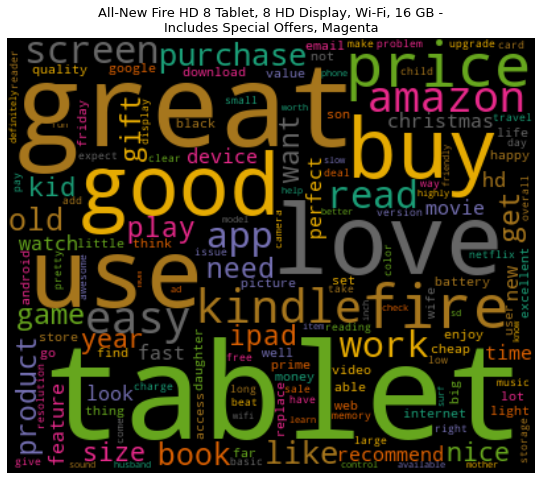

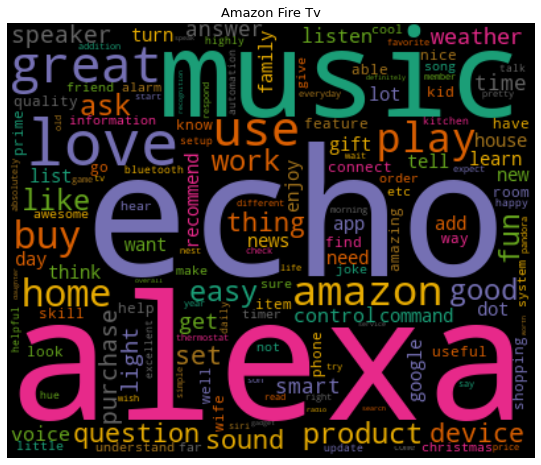

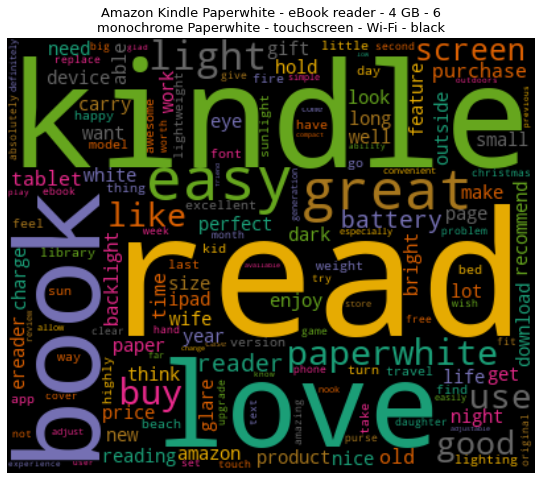

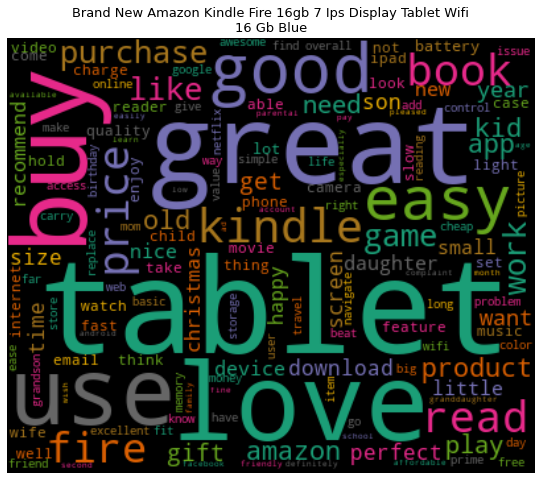

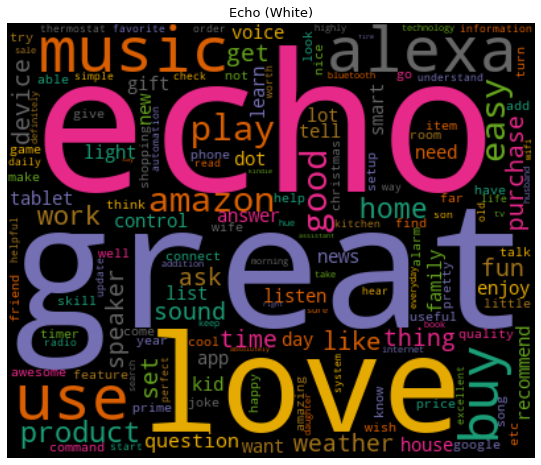

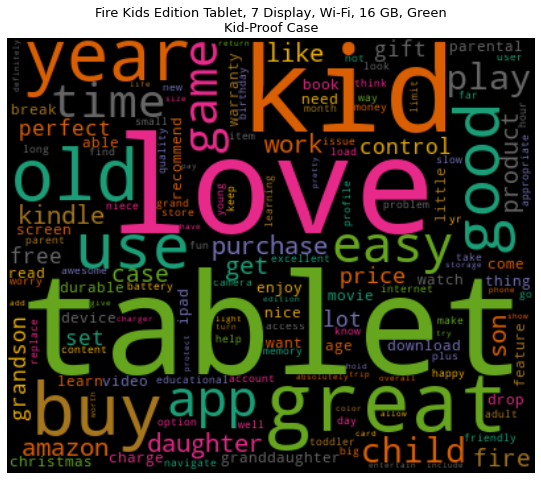

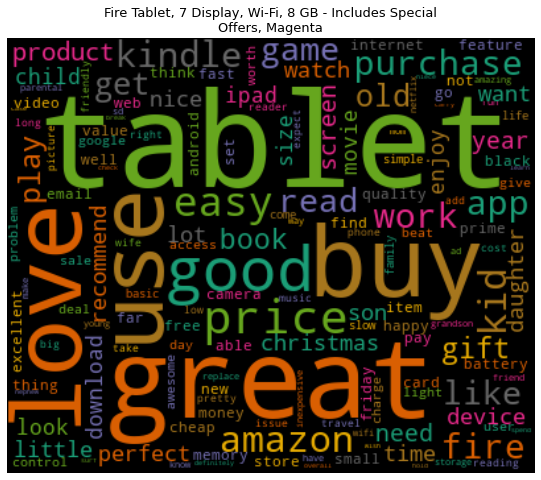

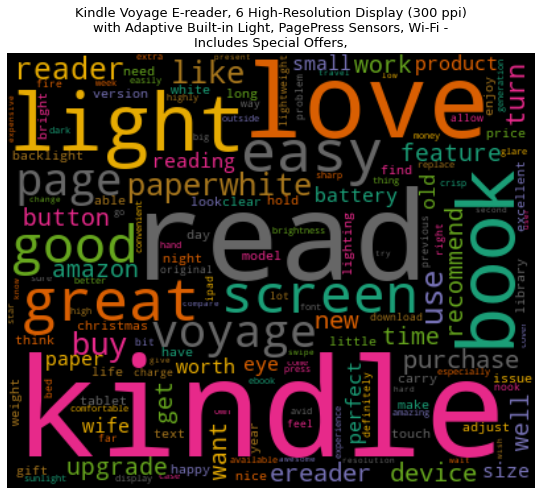

In [39]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  # Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

Here, we can see that LOVE, USE, BUY, GREAT, and EASY are the most frequently occurring words for almost every product. This means that users are loving products from Amazon and found purchasing them a great decision. They also found them easy to use.

Here, in this case, checking only the polarity, i.e., how much a text is positive or negative, is sufficient. We can check the polarity of a review using the TextBlob library in Python:

In [40]:

from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

Let’s take a look at some of the most positive and negative reviews from the customers:

In [41]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 This is an excellent product to give as a gift, one of the most reliable brands in the market.
Review 2:
 My Fire Kindle is wonderful and I use it all the time.
Review 3:
 Perfect for Home Automation and Wireless Entertainment.


In [42]:

print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['reviews.text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Bought it so my son would stop grabbing for my phone. Does what it needs to but battery life is horrible
Review 2:
 Reason I would not give it a full five stars is because of the fact that is so loaded down with adware for Amazon but an awful lot of that is what makes it affordable so $49 cannot beat it
Review 3:
 I really like the Paperwhite, it made me want to read books on my Kindle again. Try it if you hate it, return it, but get your hands on this for a while, and I am convinced you will keep it.


Let’s plot polarities of reviews for each product and compare them. A bar graph is best suited for this purpose:

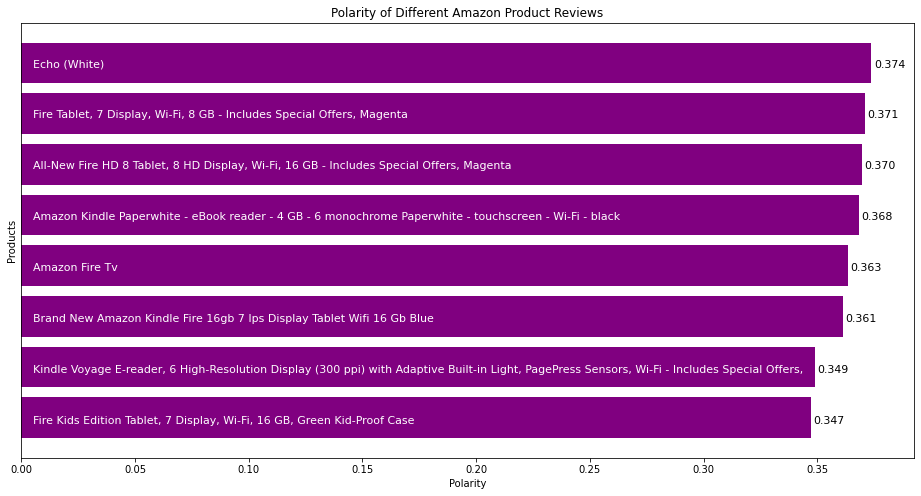

In [43]:
product_polarity_sorted=pd.DataFrame(df.groupby('name')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

You can see that according to the polarity of reviews, Amazon needs to improve Fire Kids Edition Tablet and Kindle Voyage E-reader. Let’s also take a look at the number of reviewers who recommended a particular product. For this, we can take the percentage of reviewers and plot that:

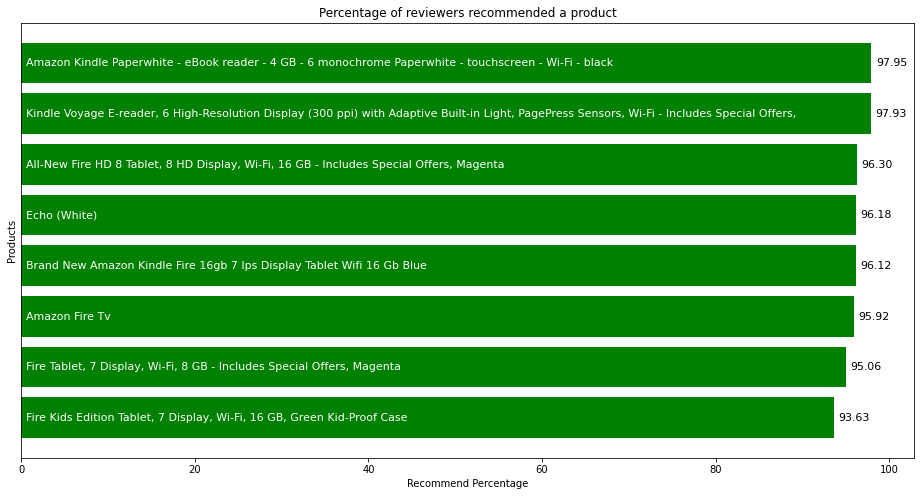

In [44]:
recommend_percentage=pd.DataFrame(((df.groupby('name')['reviews.doRecommend'].sum()*100)/df.groupby('name')['reviews.doRecommend'].count()).sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Recommend Percentage')
plt.ylabel('Products')
plt.title('Percentage of reviewers recommended a product')
recommend_graph=plt.barh(np.arange(len(recommend_percentage.index)),recommend_percentage['reviews.doRecommend'],color='green')

# Writing product names on bar
for bar,product in zip(recommend_graph,recommend_percentage.index):
  plt.text(0.5,bar.get_y()+0.4,'{}'.format(product),va='center',fontsize=11,color='white')

# Writing recommendation percentage on graph
for bar,percentage in zip(recommend_graph,recommend_percentage['reviews.doRecommend']):
  plt.text(bar.get_width()+0.5,bar.get_y()+0.4,'%.2f'%percentage,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

Here, we can see that the Fire Kids Edition Tablet has the lowest recommendation percentage. It’s reviews also have the lowest polarity. So, we can say that the polarity of reviews affects the chances of a product getting recommended.

Another thing that we can look at is the readability of reviews upvoted as helpful by others. The readability of a text document can be checked using various readability indices like Flesch Reading Ease, Dale Chall Readability Score, and Gunning Fog Index.

For this, we can use the textstat library in Python. Textstat is typically used for determining readability, complexity, and grade level of a particular corpus. Each of these indices works on a different methodology for determining the readability level of a document.

In [48]:
!pip install textstat



     |████████████████████████████████| 102kB 2.4MB/s 
     |████████████████████████████████| 3.0MB 8.5MB/s 


In [49]:
import textstat
df['dale_chall_score']=df['reviews.text'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['flesh_reading_ease']=df['reviews.text'].apply(lambda x: textstat.flesch_reading_ease(x))
df['gunning_fog']=df['reviews.text'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['dale_chall_score'].mean())
print('Dale Chall Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['dale_chall_score'].mean())

print('Flesch Reading Score of upvoted reviews=>',df[df['reviews.numHelpful']>1]['flesh_reading_ease'].mean())
print('Flesch Reading Score of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['flesh_reading_ease'].mean())

print('Gunning Fog Index of upvoted reviews=>',df[df['reviews.numHelpful']>1]['gunning_fog'].mean())
print('Gunning Fog Index of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['gunning_fog'].mean())


Dale Chall Score of upvoted reviews=> 6.148739837398377
Dale Chall Score of not upvoted reviews=> 5.695477993940365
Flesch Reading Score of upvoted reviews=> 81.98257113821124
Flesch Reading Score of not upvoted reviews=> 84.8586581087524
Gunning Fog Index of upvoted reviews=> 7.980264227642276
Gunning Fog Index of not upvoted reviews=> 6.8617784244936715


There is very little difference in the Dale Chall Score and the Flesch Reading Score for helpful and not helpful reviews. But there is a considerable amount of variation in the Gunning Fog Index.

Still, we cannot tell the difference in the readability of the two. The textstat library has a solution for this as well. It provides the text_standard() function. that uses various readability checking formulas, combines the result and returns the grade of education required to understand a particular document completely.

In [50]:

df['text_standard']=df['reviews.text'].apply(lambda x: textstat.text_standard(x))

print('Text Standard of upvoted reviews=>',df[df['reviews.numHelpful']>1]['text_standard'].mode())
print('Text Standard of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['text_standard'].mode())

Text Standard of upvoted reviews=> 0    5th and 6th grade
dtype: object
Text Standard of not upvoted reviews=> 0    5th and 6th grade
dtype: object


Interesting. Both upvoted and not upvoted reviews are easily understandable by anyone who has completed the 5th or 6th grade in school.

Let’s take a look at the reading time of reviews upvoted as helpful and non-helpful. An average adult reads about 250 words per minute. We can also calculate the reading time of a document using the textstat library. It provides the reading_time() function, which takes a piece of text as an argument and returns the reading time for it in seconds.

In [51]:

df['reading_time']=df['reviews.text'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of upvoted reviews=>',df[df['reviews.numHelpful']>1]['reading_time'].mean())
print('Reading Time of not upvoted reviews=>',df[df['reviews.numHelpful']<=1]['reading_time'].mean())

Reading Time of upvoted reviews=> 3.4542174796747958
Reading Time of not upvoted reviews=> 1.7917397544251397


Surprisingly, the reading time of upvoted reviews is twice that of not upvoted reviews. It means that people usually find longer reviews helpful.

#What’s the Conclusion from the EDA on Text Data?

Let’s take a look at the inferences drawn from the above analysis:

1.Customers love products from Amazon. They find them a great purchase and easy to use

2.Amazon needs to work on the Fire Kids Edition Tablet because it has the most negative reviews. It is also the least recommended product

3.The majority of reviews are written in simple English and are easily understandable by anyone who has 5th or 6th grade of school

4.The reading time of helpful reviews is twice that of non-helpful reviews which means people find longer reviews helpful

You need to understand that there is no fixed way of doing exploratory data analysis. It is entirely dependent on the data you have, the problem statement that you have to solve, and domain knowledge. One set of procedures that work flawlessly on one data might not work on another data. The only way to master this aspect is by analyzing different datasets from various domains.